# 프로젝트 제출

이 파일은, aiffel 2022년도 3기의 노드 중 하나인
 - EXPLORATION_SO3 : 1. Iris의 세 가지 품종, 분류해볼 수 있겠어요?
 
와 관련한 프로젝트입니다.
(저는 aiffel 교육생 김선중 입니다.)

## 목차
1. `digits` dataset

2. `wine` dataset

3. `breast_cancer` dataset

|평가문항|상세기준|
|:-|:-|
|데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?|feature와 label 선정을 위한 데이터 분석과정을 전개함|
|데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?|모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음|
|데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?|모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음|

1. 데이터셋의 구성을 파악하고, 데이터를 이해하기
 - 노드에 진행된 것과 비슷하게 진행했습니다.
2. 데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻기
 - 노드에 진행된 것과 비슷하게 진행했습니다.
3. 데이터셋에 대해 모델의 평가 지표를 선택하기
 - 평가지표(evaluation metric)에 관해서는 LMS에는 이진분류에 관한 평가지표만 소개되어 있고 다중분류에 대한 평가지표가 소개되어 있지 않았으므로 따로 [공부](https://github.com/govin08/aiffel/blob/master/004_articles_and_materials/0906_evaluation_metrics.ipynb)해 보았습니다.
 여기에서 공부한 evaluation metric들은 다음과 같습니다.
    - 이진분류 문제 : accuracy / precision / recall / F1-score
    - 다중분류 문제 : macro-precision / macro-recall / macro-F1-score / weighted-accuracy / weighted-precision / macro-recall / macro-F1-score
    - 다중분류 문제 : Cohen's kappa
 - `breast_cancer` 데이터셋은 이진분류문제입니다.
 이 문제의 경우 FN(false negative)가 발생하면 치명적입니다.
 다시 말해, 실제로 암에 걸렸는데, 암이라고 진단하지 못한 경우가 발생하는 것은 어떻게 해서든 막아야 합니다.
 따라서, recall을 사용하는 것이 맞다고 보았습니다.
 - `digits` 데이터셋의 경우 다중분류문제입니다.
 이 데이터셋에 대한 모델이 "은행 창구의 비밀번호 입력"과 같은 절차에 사용된다고 할 때, FP의 경우가 발생하는 것이 치명적입니다.
 다시 말해, 비밀번호가 실제로 3인데, 다른 숫자나 다른 모양이 입력되었는데도 불구하고(actual negative), 우리 모델이 그것을 3으로 인식하는(predicted positive) 경우에는 심각한 보안상의 문제가 발생할 수 있습니다.
 따라서 FP를 막기 위해 precision을 사용해야 한다고 보았습니다.
 다만, 여기서의 precision의 의미는, 다중분류에서의 precision이므로, macro-precision이나 weighted precision을 고려해야 한다고 봤습니다.
 한편, 다중분류이니만큼, 전체적인 상황을 아울러서 평가할 수 있는 Cohen's kappa를 사용하는 것도 괜찮은 대안이라고 보았습니다.
 - `wine` 데이터셋의 경우 다중 분류문제입니다.
 여기에서는 특별히 FP나 FN이 대단한 피해를 주거나 하는 것이 없습니다.
 따라서 이 경우에는 FP와 FN을 골고루 고려하는, 즉, recall과 precision을 골고루 고려하는 F1-score를 사용하는 것이 맞다고 보았습니다.
 이번에도, 여기서의 F1-score의 의미는 macro-precision이나 weighted precision입니다.
 마찬가지로, 다중분류이니만큼, 전체적인 상황을 아울러서 평가할 수 있는 Cohen's kappa를 사용하는 것도 괜찮은 대안이라고 보았습니다.
 - 이 평가지표들은 `sklearn`에서 기본적으로 제공하는 명령어들이니 만큼, 간단하게 호출했습니다.

## 1. `digits` dataset

## 1.1. 필요한 모듈 import 하기

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm`
from sklearn.linear_model import SGDClassifier, LogisticRegression # _sgd,  _lr

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, cohen_kappa_score

모듈들을 import합니다.
 - line 1-2 : 기본 모듈들인 `numpy`와 `matplotlib`을 불러옵니다.`matplotlib`은 confusion matrix를 예쁘게 그리는 데 사용됩니다.
 - line 4-6 : `digits` dataset을 불러오기 위해 `load_digits` 모듈을 불러옵니다.
 training set과 testset을 분리하기 위해 `train_test_split` 모듈을 불러옵니다.
 전처리과정을 위해 `preprocessing` 모듈을 불러옵니다.
 - line 8 ~ 11 : 다섯 개의 서로 다른 모델 (decision tree classifier, random forest classifier, support vector machine, stochastic gradient descent classifier, logistic regression)을 사용하기 위해 해당 모듈들을 불러옵니다.
 - line 13 : confusion matrix를 불러오거나 그리는 데 필요한 모듈들을 불러옵니다.
 또한, 모델의 평가지표를 나타내기 위한 `classification_report`, `cohen_kappa_score` 모듈들을 import합니다.

## 1.2. 데이터 준비

In [2]:
digits = load_digits()
print(type(digits))
# print(digits)
print(dir(digits))
print(digits.keys())

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


 - line 1 : `load_digits()`으로 데이터를 불러와 `digits`에 할당합니다.
 - line 2, 3 : `digits`는 `sklearn.utils.Bunch`라는 타입을 가지고 있는데, [이것](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)은 `sklearn`에서 딕셔너리와 같은 역할을 하는 클래스인 것 같습니다.
 - line 4 : 파이썬의 내장함수 [`dir()`](https://docs.python.org/ko/3/library/functions.html#dir)을 사용합니다.
 - line 5 : `digits`의 키값을 `keys()` 메소드를 통해 호출합니다.
 `digits`의 key들이 나열되는데, 이 중 `data`, `target`, `target_names`, `DESCR`, `feature_names`를 살펴볼 예정입니다.
 노드에서의 `iris` dataset에 비교하면, `filename`이 없습니다.

## 1.3. 데이터 이해하기

In [3]:
digits_data = digits.data
digits_label = digits.target

`digits_data`와 `digits_label`을 정의합니다.
 각각 input feature와 label의 역할을 하게 될 것들입니다.

In [4]:
print(type(digits_data))
print(digits_data.shape)
print(digits_data[0])
print(digits_data.max())

<class 'numpy.ndarray'>
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
16.0


`digits_data`의 타입과 shape, 첫번째 요소를 출력합니다.
 - line 1 : 타입은 `np.array`입니다.
 - line 2 : shape으로 보아 $1797\times 64$ 모양의 행렬입니다.
 즉, data(sample)의 개수는 1797개이고, feature의 개수는 64개입니다.
 feature의 개수가 64개인 것은, 각각의 sample들이 $8\times8$의 픽셀을 가진 그림파일이기 때문입니다.
 - line 3, 4 : 첫번째 sample을  출력하니 16차원의 벡터가 나옵니다.
 많이 쓰이는 MNIST dataset이 0부터 255까지의 정수를 가지는 것과 달리, 여기에서는 0부터 15까지의 숫자가 보입니다.
 실제로 `digits_data` 행렬에서 entry의 최댓값을 구해보니 16이 나오는 걸로 봐서, 0부터 255까지의 정수가 아닌 0부터 16까지의 정수를 고려하는 것으로 보입니다.

첫번째 sample을 그림으로 나타내면 다음과 같습니다.

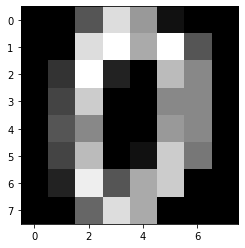

In [5]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')

In [6]:
print(type(digits_label))
print(digits_label.shape)
print(digits_label[0])

<class 'numpy.ndarray'>
(1797,)
0


`digits_label`의 타입과 shape, 첫번째 요소를 출력합니다.
 - line 1 : 타입은 `np.array`입니다.
 - line 2 : shape으로 보아 1797 차원의 벡터라고 생각할 수 있습니다.
 각각의 sample들의 label은 $\{0,1,2,3,4,5,6,7,8,9\}$의 원소입니다.

In [7]:
print(digits.target_names)
print(digits.feature_names)
# print(digits.filename)
print(digits.DESCR)

[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteris

 - line 1 : label들의 이름을 출력합니다.
 방금 언급했듯 label은 $\{0,1,2,3,4,5,6,7,8,9\}$의 원소입니다.
 - line 2 : feature들의 이름을 출력합니다.
 위에 언급했듯, feature들은 $8\times8$의 그림파일의 각 픽셀값을 나타냅니다. 그걸 반영하듯 feature의 이름들이 `'pixel_2_3'`와 같이 되어 있습니다.
 좌표 (2,3)의 픽셀값이라는 뜻입니다.
 픽셀값이 0이면 해당 픽셀이 검은색을 나타내고 픽셀값이 높아질수록 흰색에 가까운 색을 나타냅니다.
 - line 3 : 2번 셀에서 말했듯 `filename`은 불러올 수 없습니다.
 - line 4 : `digits` dataset에 대한 상세한 정보를 출력합니다.

## 1.4. train, test 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=1)

 - 우리는 데이터 `digits`에서 각각 `digits_data`, `digits_label`를 얻었었습니다.
 이것들을 각각 8:2의 비율로 잘라, training set과 test set으로 나눕니다.
 즉
    - `digits_data` → `X_train`, `X_test`
    - `digits_label` → `y_train`, `y_test`
 
 와 같이 나눕니다.

In [9]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

print(type(X_test))
print(X_test.shape)
print(X_test[0])

print(type(y_train))
print(y_train.shape)
print(y_train[0])

print(type(y_test))
print(y_test.shape)
print(y_test[0])

<class 'numpy.ndarray'>
(1437, 64)
[ 0.  0.  0.  2. 15.  8.  0.  0.  0.  0.  1. 15. 13.  3.  0.  0.  0.  0.
  9. 13.  1.  0.  0.  0.  0.  1. 15.  6.  0.  5. 11.  0.  0.  7. 14.  0.
  1. 15.  8.  0.  0.  8. 15.  9. 15. 16.  3.  0.  0.  1. 11. 16. 16. 10.
  0.  0.  0.  0.  0.  2. 15.  5.  0.  0.]
<class 'numpy.ndarray'>
(360, 64)
[ 0.  0.  6. 16. 11.  0.  0.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  4.  0.  0.  0.  0. 10. 16. 13.  0.  0.  0.  0.  0. 13. 16.
 12.  0.  0.  0.  0.  0. 10. 16.  9.  0.  0.  0.  0.  0.  9. 16. 10.  0.
  0.  0.  0.  0.  4. 15. 16.  3.  0.  0.]
<class 'numpy.ndarray'>
(1437,)
4
<class 'numpy.ndarray'>
(360,)
1


네 개의 서로다른 `np.array`들에 대하여 타입과 shape, 첫번째 요소를 출력해봅니다.
 - line 1 ~ 3 : `X_train`은 $1437\times 64$ 형태의 행렬입니다.
 열의 개수, 즉 feature의 개수는 당연히 64로 일정하고 행의 개수는 1797에서 1437개로 약 80%가 되었습니다.
 정확히 계산해보면 $1797\times 0.8=1437.6$이므로 1797에 0.8을 곱한 후 `floor()`같은 것을 씌워 정수부분만 출력한 듯합니다.
 [공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)에는 정확히 나와있지 않습니다.
 - line 5 ~ 7 : `X_test`은 $360\times 64$ 형태의 행렬입니다.
 - line 9 ~ 11 : `y_train`은 1437차원의 벡터입니다.
 - line 13 ~ 15 : `y_test`은 360차원의 벡터입니다.

### 표준화(standardization)

표준화(zscore, standardization)를 진행시킵니다.
일부 모델의 경우 학습시 경고문구가 뜨기 때문에 하게 되었습니다.
표준화해놓은 데이터를 만들어놓고 `_stan`이라는 접두어를 붙여 저장해놓았습니다.
`X_train`의 평균과 표준편차를 계산한 후, `X_train`과 `X_test` 모두에 대하여 표준화했습니다.
(`X_test`을 표준화할 때에도 `X_train`을 표준화할 때와 똑같이 해야 합니다.)

In [10]:
scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler.mean_)
print(scaler.scale_)

[0.00000000e+00 3.04105776e-01 5.23312457e+00 1.18559499e+01
 1.18469033e+01 5.78705637e+00 1.41057759e+00 1.28740431e-01
 3.47947112e-03 1.97494781e+00 1.04272791e+01 1.20508003e+01
 1.03145442e+01 8.15100905e+00 1.87265136e+00 1.07863605e-01
 2.78357690e-03 2.57967989e+00 9.95685456e+00 7.08907446e+00
 7.16144746e+00 7.85316632e+00 1.79610299e+00 5.01043841e-02
 1.39178845e-03 2.48712596e+00 9.05288796e+00 8.90953375e+00
 1.00981211e+01 7.50034795e+00 2.27696590e+00 1.39178845e-03
 0.00000000e+00 2.30688935e+00 7.68823939e+00 9.25400139e+00
 1.03799582e+01 8.64509395e+00 2.86430063e+00 0.00000000e+00
 9.04662491e-03 1.51078636e+00 6.86778010e+00 7.33472512e+00
 7.66597077e+00 8.10160056e+00 3.46068198e+00 2.71398747e-02
 9.04662491e-03 6.96590118e-01 7.42171190e+00 9.62073765e+00
 9.39665971e+00 8.64300626e+00 3.73764788e+00 2.01113431e-01
 6.95894224e-04 2.86012526e-01 5.55671538e+00 1.21183020e+01
 1.17153793e+01 6.69102296e+00 2.05567154e+00 3.47251218e-01]
[1.         0.90544851 

In [11]:
X_train_stan = scaler.transform(X_train)
X_test_stan = scaler.transform(X_test)

In [12]:
print(type(X_train_stan))
print(X_train_stan.shape)
print(X_train_stan[0])

print(type(X_test_stan))
print(X_test_stan.shape)
print(X_test_stan[0])

<class 'numpy.ndarray'>
(1437, 64)
[ 0.         -0.33586203 -1.10017452 -2.32978146  0.73976343  0.38813303
 -0.41648296 -0.12945485 -0.04991522 -0.62810365 -1.73898453  0.75007823
  0.56326513 -0.85564297 -0.52324996 -0.1315381  -0.04311807 -0.7311589
 -0.16863817  1.01961119 -1.00288033 -1.26659687 -0.54675418 -0.11861824
 -0.03733267 -0.46653546  0.95768973 -0.49846984 -1.66027444 -0.42466618
  2.3871721  -0.03733267  0.          1.36795042  1.00165778 -1.47964578
 -1.59111899  1.07500911  1.4593525   0.         -0.05806465  2.26558545
  1.24632023  0.25869065  1.1800553   1.37472954 -0.10599477 -0.09095581
 -0.03963009  0.17495652  0.63429529  1.2177293   1.2469861   0.22339772
 -0.75578905 -0.20882103 -0.02638899 -0.30430272 -1.08978156 -2.33532938
  0.66065318 -0.28617718 -0.5051025  -0.19346158]
<class 'numpy.ndarray'>
(360, 64)
[ 0.         -0.33586203  0.16122238  0.97958403 -0.19869612 -1.01500449
 -0.41648296 -0.12945485 -0.04991522 -0.62810365 -0.26328023  1.00441103
  1.19

### 정규화(normalization)

정규화(minmax, normalization)를 진행시킵니다.
일부 모델의 경우 학습시 경고문구가 뜨기 때문에 하게 되었습니다.
정규화해놓은 데이터를 만들어놓고 `_norm`이라는 접두어를 붙여 저장해놓았습니다.
`X_train`의 최솟값과 최댓값을 계산한 후, `X_train`과 `X_test` 모두에 대하여 정규화했습니다.
(`X_test`을 정규화할 때에도 `X_train`을 정규화할 때와 똑같이 해야 합니다.)
따라서 정규화해놓은 `X_test`의 값들은 0과 1사이의 범위를 넘어설 수 있습니다.

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_train_norm

array([[0.    , 0.    , 0.    , ..., 0.3125, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.8125, 0.75  , 0.125 ],
       ...,
       [0.    , 0.    , 0.4375, ..., 0.8125, 0.125 , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.0625, 0.    ],
       [0.    , 0.    , 0.5   , ..., 0.    , 0.    , 0.    ]])

In [15]:
X_test_norm = min_max_scaler.transform(X_test)
X_test_norm

array([[0.    , 0.    , 0.375 , ..., 0.1875, 0.    , 0.    ],
       [0.    , 1.    , 0.8125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.25  , ..., 0.375 , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.0625, 0.    , 0.    ],
       [0.    , 0.375 , 0.9375, ..., 1.    , 1.    , 0.125 ],
       [0.    , 0.    , 0.5   , ..., 0.    , 0.    , 0.    ]])

## 1.5. 다양한 모델로 학습시켜보기

여기에서는 다섯 개의 모델
 - decision tree classifier # _dt
 - random forest classifier # _rf
 - support vector machine # _svm
 - stochastic gradient descent classfier # sgd
 - logistic regression # _lr
 
을 가지고 학습을 진행시키고, 그 결과로 여러 평가지표를 얻는 작업을 수행합니다.
평가지표는 `y_pred_dt`와 같은 이름으로 출력됩니다.
이때, 각각의 모델들에 따라 `y_pred`의 뒤에 접두어를 붙였습니다.
예를 들어, `_dt`는 decision tree라는 뜻입니다.
 
<!-- 이 과정을 앞으로 세 번 반복할 것이고, 또 어차피 결과적으로
 - `y_pred_dt`
 - `y_pred_rf`
 - `y_pred_svm`
 - `y_pred_sgd`
 - `y_pred_lr`

의 다섯개만 잘 출력하면 되므로 이 과정을 하나의 함수 `get_y_pred`로 지정해놓았습니다. -->

In [16]:
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [17]:
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [18]:
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [19]:
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [21]:
# logistic regerssion
# _lr
logistic_model = LogisticRegression() # convergence warning
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test) 

# logistic_model = LogisticRegression() # no convergence warning
# logistic_model.fit(X_train_stan, y_train)
# y_pred_lr = logistic_model.predict(X_test_stan) 

# logistic_model = LogisticRegression() # convergence warning
# logistic_model.fit(X_train_norm, y_train)
# y_pred_lr = logistic_model.predict(X_test_norm)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 - `random_state` logistic regession을 제외한 각각의 모델들은 어느 정도의 임의성(randomness)을 수반합니다.
 그 임의성은 각 알고리즘마다 작용되는 원리가 다 다릅니다.
 예를 들어 `RandomForestClassifier`의 `random_state`에 관해서는 [다음과 같은 설명](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)을 찾을 수 있는 반면
 > Controls both the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node
 
 `SGDClassifier`에 관해서는 [다른 설명](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)이 검색됩니다.
 > Used for shuffling the data, when shuffle is set to `True`.
 정확히 말하면, `LogisticRegression` 모델도 `random_state`라는 인자를 갖기는 하지만, [사실상 사용되지 않는다고도 합니다.](https://github.com/scikit-learn/scikit-learn/issues/4760)
 
 - `LogisticRegression` 모델에 대해서는 기존과는 다른 데이터(`X_train_stan`, `X_test_stan`)를 넣었습니다.
 이것들은 기존의 `X_train`과 `X_test`에 standardization을 적용한 결과입니다.
 이렇게 넣은 이유는, 그냥 `X_train`과 `X_test`를 넣었을 때에 다음과 같은 경고 메시지가 뜨기 때문이었습니다.
 ```
 /opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 ```
 
 같은 조의 한용님의 조언에 따라 standardization을 수행하여 `X_train_stan`과 `X_test_stan`을 넣으면, 경고 메시지가 더이상 뜨지 않습니다.
 반면, normalization의 경우에는 여전히 경고 메시지가 뜹니다.
 하지만, 다른 모델들과의 형평성을 위해 standardization과 normalization을 수행하지 않은 결과만을 출력했습니다.
 (다른 것들은 주석처리했습니다.)

## 1.6. 모델을 평가해보기

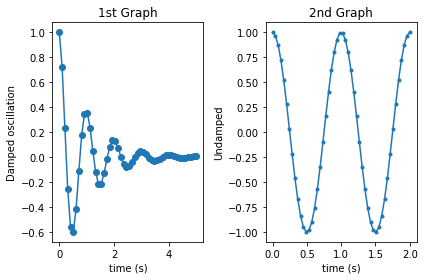

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(1, 2, 1)                # nrows=1, ncols=2, index=1
plt.plot(x1, y1, 'o-')
plt.title('1st Graph')
plt.xlabel('time (s)')
plt.ylabel('Damped oscillation')

plt.subplot(1, 2, 2)                # nrows=1, ncols=2, index=2
plt.plot(x2, y2, '.-')
plt.title('2nd Graph')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()
plt.show()


Confusion matrix, without normalization
[[13  0  0]
 [ 0 13  3]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.81 0.19]
 [0.   0.   1.  ]]


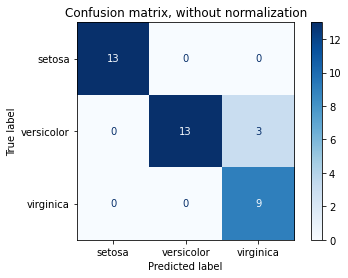

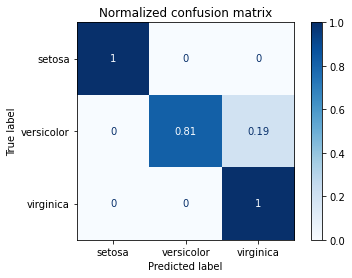

In [30]:
import numpy as num
import matplotlib.pyplot as plot

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


iris = datasets.load_iris()
x = iris.data
y = iris.target
class_names = iris.target_names


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)


classifier = svm.SVC(kernel="linear", C=0.02).fit(x_train, y_train)

num.set_printoptions(precision=2)

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(
        classifier,
        x_test,
        y_test,
        display_labels=class_names,
        cmap=plot.cm.Blues,
        normalize=normalize,
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)

plot.show()


In [23]:
classifiers = [DecisionTreeClassifier(random_state=1), 
               RandomForestClassifier(random_state=1),
               svm.SVC(random_state=1), 
               SGDClassifier(random_state=1)]
for cls in classifiers:
    cls.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

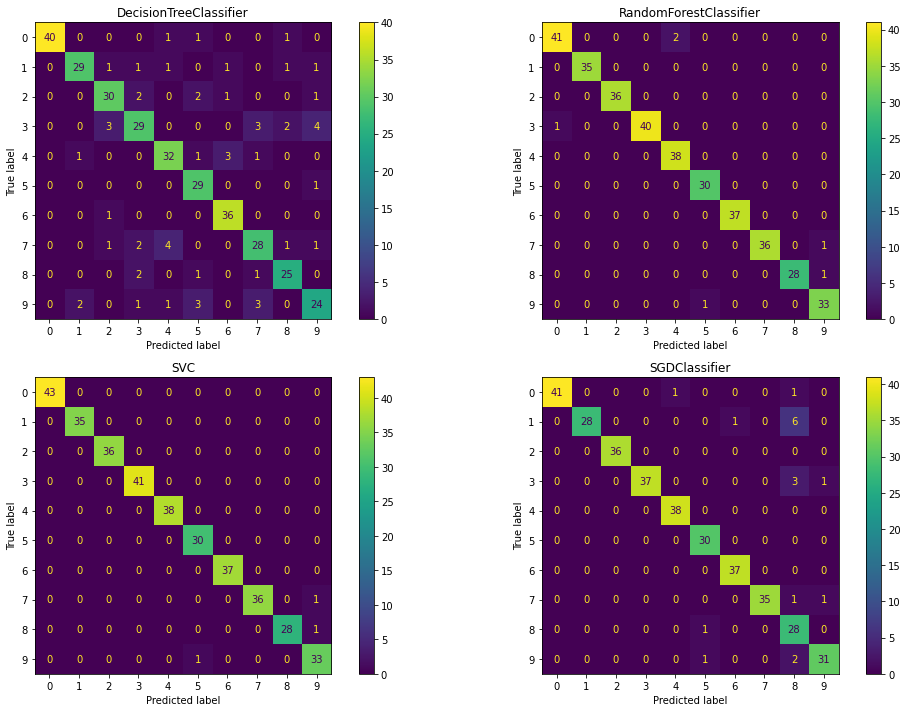

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, ax=ax,
                         display_labels = digits.target_names)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()


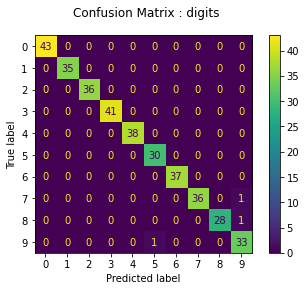

In [27]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
disp.figure_.suptitle("Confusion Matrix : digits")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [22]:
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.91      0.83      0.87        35
           2       0.83      0.83      0.83        36
           3       0.78      0.71      0.74        41
           4       0.82      0.84      0.83        38
           5       0.78      0.97      0.87        30
           6       0.88      0.97      0.92        37
           7       0.78      0.76      0.77        37
           8       0.83      0.86      0.85        29
           9       0.75      0.71      0.73        34

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00 

## 1.12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다 

### 1.12.1 필요한 모듈 import 하기

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm
from sklearn.linear_model import SGDClassifier # _sgd
from sklearn.linear_model import LogisticRegression # _lr
from sklearn.metrics import classification_report

### 1.12.2 데이터 준비

In [ ]:
wine = load_wine()

In [ ]:
print(dir(wine))
print(wine.keys())

### 1.12.3 데이터 이해하기

In [ ]:
wine_data = wine.data
wine_label = wine.target

In [ ]:
print(type(wine_data))
print(wine_data.shape)
print(wine_data[0])

In [ ]:
print(type(wine_label))
print(wine_label.shape)
print(wine_label[0])

In [ ]:
print(wine.target_names)
print(wine.DESCR)
print(wine.feature_names)
# print(wine.filename)

### 1.12.4 train, test 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [ ]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

print(type(X_test))
print(X_test.shape)
print(X_test[0])

print(type(y_train))
print(y_train.shape)
print(y_train[0])

print(type(y_test))
print(y_test.shape)
print(y_test[0])

### 1.12.5. 다양한 모델로 학습시켜보기

In [ ]:
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [ ]:
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [ ]:
# logistic regerssion
# _lr
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

### 1.12.6. 모델을 평가해보기

In [ ]:
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_lr))

## 1.13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

### 1.13.1 필요한 모듈 import 하기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm
from sklearn.linear_model import SGDClassifier # _sgd
from sklearn.linear_model import LogisticRegression # _lr
from sklearn.metrics import classification_report

### 1.13.2 데이터 준비

In [ ]:
breast_cancer = load_breast_cancer()

In [ ]:
print(dir(breast_cancer))
print(breast_cancer.keys())

### 1.13.3 데이터 이해하기

In [ ]:
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

In [ ]:
print(type(breast_cancer_data))
print(breast_cancer_data.shape)
print(breast_cancer_data[0])

In [ ]:
print(type(breast_cancer_label))
print(breast_cancer_label.shape)
print(breast_cancer_label[0])

In [ ]:
print(breast_cancer.target_names)
print(breast_cancer.DESCR)
print(breast_cancer.feature_names)
# print(breast_cancer.filename)

### 1.13.4 train, test 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [ ]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

print(type(X_test))
print(X_test.shape)
print(X_test[0])

print(type(y_train))
print(y_train.shape)
print(y_train[0])

print(type(y_test))
print(y_test.shape)
print(y_test[0])

### 1.13.5. 다양한 모델로 학습시켜보기

In [ ]:
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [ ]:
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [ ]:
# logistic regerssion
# _lr
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

### 1.13.6. 모델을 평가해보기

In [ ]:
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_lr))